<a href="https://colab.research.google.com/github/PalemSandeepSrinivas/Email_classfier/blob/main/Email_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem statement


## TO CLASSIFY THE MAIL AS SPAM OR HAM BY USING MACHINE MODEL,AND GIVE THE BEST ACCURACY SCORE TO THE PROBLEMS.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Import the standard librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import re
from textblob import TextBlob ## used to get the part's of speech
from nltk.tokenize.toktok import ToktokTokenizer # toktok one sentences for one line and words very good for english 
import string
import nltk
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import spacy
nlp = spacy.load('en_core_web_sm', disable=['ner'])
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Read the data uisng the pandas
data=pd.read_csv('/content/drive/MyDrive/spam.csv',encoding="ISO-8859-1")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
#data shape
data.shape

(5572, 5)

In [5]:
#data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
#data columns
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

# DataPrepocessing

In [7]:
#Check the null the values in the dataset
data.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [8]:
#Remove the unwanted columns
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
#Rename the columns
data.rename(columns={'v1':'label','v2':'text'},inplace=True)
data[['label','text']][:10]

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


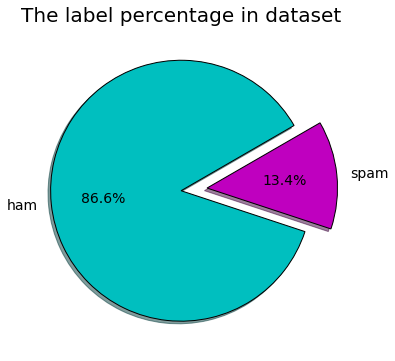

In [10]:
#to visuaize the label percentage in the train dataset
label=data['label'].value_counts()
#to visualize the above information in the pie chart
plt.figure(figsize=(18,6))
plt.pie(label,labels=['ham','spam'],colors=['c','m'],wedgeprops={'edgecolor':'black'},textprops={'fontsize': 14},startangle=30,autopct='%1.1f%%',explode=[0,0.2],shadow=True)
#set the title name with fontsize 
plt.title("The label percentage in dataset",fontsize=20)
plt.show()

In [11]:
#Create the function and remove the punctuation
def remove_punctuation(text):
    for punctuation in string.punctuation:
        text=text.replace(punctuation,'')
    return text
#And apply function to the train dataset
data['text']=data['text'].apply(remove_punctuation)

In [12]:
#create the remove the stopwords
import nltk
nltk.download('stopwords')
stop_words_list=nltk.corpus.stopwords.words('english')
stop_words_list.remove('no')
stop_words_list.remove('not')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
#install the tokeninzer
tokenizer = ToktokTokenizer()
#Create function to remove the stopwords
def remove_stopwords(text,is_lower_case=True):
    tokens=tokenizer.tokenize(text)
    tokens=[token.strip() for token in tokens]
    if is_lower_case:
        filterd_tokens=[token for token in tokens if token not in stop_words_list]
    else:
        filterd_tokens=[token for token in tokens if token.lower() not in stop_words_list]
    filterd_text=' '.join(filterd_tokens)
    return filterd_text
data['text']=data['text'].apply(remove_stopwords)

In [14]:
#remove the special characters
def remove_special_characters(text):
    text=re.sub('[^a-zA-z0-9\s]','',text)
    return text
data['text']=data['text'].apply(remove_special_characters)
data[['label','text']][:10]

,label,text
0,ham,Go jurong point crazy Available bugis n great ...
1,ham,Ok lar Joking wif u oni
2,spam,Free entry 2 wkly comp win FA Cup final tkts 2...
3,ham,U dun say early hor U c already say
4,ham,Nah I dont think goes usf lives around though
5,spam,FreeMsg Hey darling 3 weeks no word back Id li...
6,ham,Even brother not like speak They treat like ai...
7,ham,As per request Melle Melle Oru Minnaminunginte...
8,spam,WINNER As valued network customer selected rec...
9,spam,Had mobile 11 months U R entitled Update lates...


In [15]:
#Remove html patternst
def remove_html(text):
    html_pattran=re.compile('<.*?>')
    return html_pattran.sub(r' ',text)
#And apply the above function to the train data
data['text']=data['text'].apply(remove_html)

In [16]:
#Remove the html url from the train dataset
def remove_url(text):
    url=re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r' ',text)
#And apply to the train dataset
data['text']=data['text'].apply(remove_url)

In [17]:
#Remove the numbers in the dataset
def remove_numbers(text):
    text=''.join([i for i in text if  not i.isdigit()])
    return text
#And apply the above function to the train data
data['text']=data['text'].apply(remove_numbers)

In [18]:
def cleanse(word):
    rx=re.compile(r'\D*\d')
    if rx.match(word):
        return ' '
    return word
#Remove the alpha numaric
def alpha_numeric(strings):
    nstrings=[" ".join(filter(None,(cleanse(word) for word in string.split()))) for string in strings.split()]
    str1=" ".join(nstrings)
    return str1
#Apply to the above function to the train dataset
data['text']=data['text'].apply(alpha_numeric)

In [19]:
#lemmatizer
def lemmatize(text):
    text=nlp(text)
    text=" ".join([word.lemma_ if word.lemma_!='-PRON-' else word for word in text])
    return text
#Apply the above function to the train dataset
data['text']=data['text'].apply(lemmatize)

In [20]:
data[['label','text']][:10]

,label,text
0,ham,go jurong point crazy Available bugis n great ...
1,ham,ok lar Joking wif u oni
2,spam,free entry wkly comp win FA Cup final tkts st ...
3,ham,U dun say early hor U c already say
4,ham,Nah I do not think go usf live around though
5,spam,FreeMsg hey darle week no word back I d like f...
6,ham,even brother not like speak they treat like ai...
7,ham,as per request Melle Melle Oru Minnaminunginte...
8,spam,WINNER as value network customer select receiv...
9,spam,have mobile month U r entitle Update late colo...


In [21]:
data['text'][11]

'six chance win cash from pound txt CSH send Cost pday day TsandCs apply Reply hl info'

# Modeling

In [22]:
#Divided the data into X and y
X=data['text'].values
y=data['label'].values

In [23]:
#Install the TfidfVectorizer for covert the categorical data to array
vector=TfidfVectorizer()
vector.fit(X)
X=vector.transform(X)

In [24]:
#Divided the data into train_test and use 30% used for testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

# LogisticRegression

In [25]:
#Install the logisticregression model
logistic=LogisticRegression()
#Let's fit the train data
logistic.fit(X_train,y_train)

LogisticRegression()

In [26]:
#Prediction to the test data
logistic_pred=logistic.predict(X_test)
logistic_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [27]:
#Check the test score and train score to the model
print(f'The Logisticregression model test score is {logistic.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The Logisticregression model train scores is {logistic.score(X_train,y_train)*100:.2f}')
#Check the accuracy_score to the model
print(f'The logisticRegression accuracy_score {accuracy_score(y_test,logistic_pred)*100:.2f}')

The Logisticregression model test score is 94.62
The Logisticregression model train scores is 96.82
The logisticRegression accuracy_score 94.62


# Classification_report and Confusion_matrix

              precision    recall  f1-score   support

         ham       0.94      1.00      0.97      1453
        spam       0.97      0.61      0.75       219

    accuracy                           0.95      1672
   macro avg       0.96      0.80      0.86      1672
weighted avg       0.95      0.95      0.94      1672



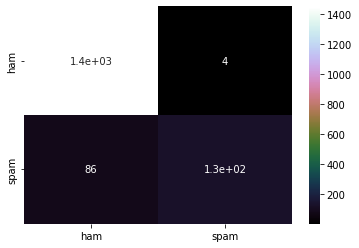

In [28]:
#Classification report
print(classification_report(y_test,logistic_pred))
#confusion_matrix
cn=confusion_matrix(y_test,logistic_pred)
sns.heatmap(cn,annot=True,cmap="cubehelix",xticklabels=['ham','spam'],yticklabels=['ham','spam'])

# DecisionTreeClassifier

In [29]:
#Import the DecisionTreeClassifier from sklean library
from sklearn.tree import DecisionTreeClassifier
#install the library
tree=DecisionTreeClassifier()
#Fit the train data to the model
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [30]:
#DecisionTreeClassifier Testdata prediction
tree_pred=tree.predict(X_test)
tree_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [31]:
#Check the test score and train score to the model
print(f'The DecisionTreeClassifier model test score is {tree.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The DecisionTreeClassifier model train scores is {tree.score(X_train,y_train)*100:.2f}')
#Check the accuracy_score to the model
print(f'The DecisionTreeClassifier accuracy_score {accuracy_score(y_test,tree_pred)*100:.2f}')

The DecisionTreeClassifier model test score is 95.69
The DecisionTreeClassifier model train scores is 100.00
The DecisionTreeClassifier accuracy_score 95.69


# Classification_report and Confusion_matrix

              precision    recall  f1-score   support

         ham       0.97      0.98      0.98      1453
        spam       0.84      0.83      0.83       219

    accuracy                           0.96      1672
   macro avg       0.91      0.90      0.91      1672
weighted avg       0.96      0.96      0.96      1672



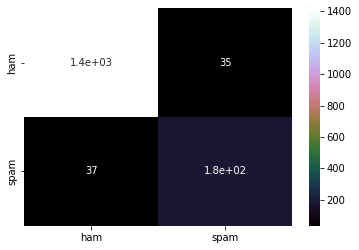

In [32]:
#Classification report
print(classification_report(y_test,tree_pred))
#confusion_matrix
cn=confusion_matrix(y_test,tree_pred)
sns.heatmap(cn,annot=True,cmap="cubehelix",xticklabels=['ham','spam'],yticklabels=['ham','spam'])

# RandomForestClassifier

In [33]:
#Import the RandomForestClassifier from the sklean library
from sklearn.ensemble import RandomForestClassifier
#install the RandomForestClassifier
random=RandomForestClassifier()
#Let's fit the traing data to the model
random.fit(X_train,y_train)

RandomForestClassifier()

In [34]:
#RandomForestClassifier prediction to the test data
random_pred=random.predict(X_test)
random_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [35]:
#Check the test score and train score to the model
print(f'The RandomForestClassifier model test score is {random.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The RandomForestClassifier model train scores is {random.score(X_train,y_train)*100:.2f}')
#Check the accuracy_score to the model
print(f'The RandomForestClassifier accuracy_score {accuracy_score(y_test,random_pred)*100:.2f}')

The RandomForestClassifier model test score is 97.13
The RandomForestClassifier model train scores is 100.00
The RandomForestClassifier accuracy_score 97.13


# Classification_report and Confusion_matrix

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1453
        spam       1.00      0.78      0.88       219

    accuracy                           0.97      1672
   macro avg       0.98      0.89      0.93      1672
weighted avg       0.97      0.97      0.97      1672



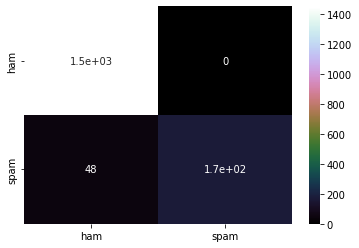

In [36]:
#Classification report
print(classification_report(y_test,random_pred))
#confusion_matrix
cn=confusion_matrix(y_test,random_pred)
sns.heatmap(cn,annot=True,cmap="cubehelix",xticklabels=['ham','spam'],yticklabels=['ham','spam'])

# XGBClassifier

In [37]:
#Install the XGBClassifier from the xgboost
from xgboost import XGBClassifier
#Install the XGBClassifier
xgb=XGBClassifier()
#Let's fit the traning data to the model
xgb.fit(X_train,y_train)

XGBClassifier()

In [38]:
#XGBClassifier prediction to the test dataset
xgb_pred=xgb.predict(X_test)
xgb_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [39]:
#Check the test score and train score to the model
print(f'The XGBClassifier model test score is {xgb.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The XGBClassifier model train scores is {xgb.score(X_train,y_train)*100:.2f}')
#Check the accuracy_score to the model
print(f'The XGBClassifier accuracy_score {accuracy_score(y_test,xgb_pred)*100:.2f}')

The XGBClassifier model test score is 96.05
The XGBClassifier model train scores is 96.95
The XGBClassifier accuracy_score 96.05


# Classification_report and Confusion_matrix

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1453
        spam       0.97      0.72      0.83       219

    accuracy                           0.96      1672
   macro avg       0.96      0.86      0.90      1672
weighted avg       0.96      0.96      0.96      1672



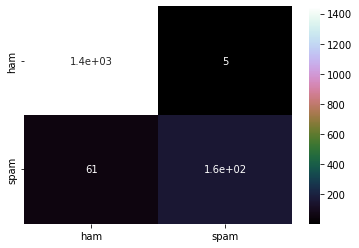

In [40]:
#Classification report
print(classification_report(y_test,xgb_pred))
#confusion_matrix
cn=confusion_matrix(y_test,xgb_pred)
sns.heatmap(cn,annot=True,cmap="cubehelix",xticklabels=['ham','spam'],yticklabels=['ham','spam'])

# MultinomialNB

In [41]:
#Import the MultinomialNB algorithm to train the our model
from sklearn.naive_bayes import MultinomialNB
#install the model
multinomial=MultinomialNB()
#fit the train data to our model
multinomial.fit(X_train,y_train)

MultinomialNB()

In [42]:
#MultinomialNB prediction to the test data
multinomial_pred=multinomial.predict(X_test)
multinomial_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [43]:
#Check the test score and train score to the model
print(f'The MultinomialNB model test score is {multinomial.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The MultinomialNB model train scores is {multinomial.score(X_train,y_train)*100:.2f}')
#Check the accuracy_score to the model
print(f'The MultinomialNB accuracy_score {accuracy_score(y_test,multinomial_pred)*100:.2f}')

The MultinomialNB model test score is 95.39
The MultinomialNB model train scores is 96.69
The MultinomialNB accuracy_score 95.39


# Classification_report and Confusion_matrix

              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1453
        spam       1.00      0.65      0.79       219

    accuracy                           0.95      1672
   macro avg       0.97      0.82      0.88      1672
weighted avg       0.96      0.95      0.95      1672



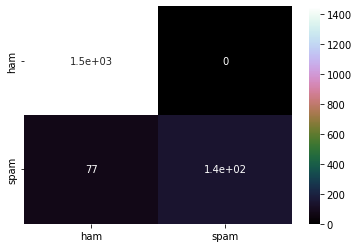

In [44]:
#Classification report
print(classification_report(y_test,multinomial_pred))
#confusion_matrix
cn=confusion_matrix(y_test,multinomial_pred)
sns.heatmap(cn,annot=True,cmap="cubehelix",xticklabels=['ham','spam'],yticklabels=['ham','spam'])

In [45]:
#Import the AdaBosstClassifier from sklearn library
from sklearn.ensemble import AdaBoostClassifier
#Install the model
adam=AdaBoostClassifier()
#Fit the traiing data to the model
adam.fit(X_train,y_train)

AdaBoostClassifier()

In [46]:
#AdaBoostClassifier prediction to the dataset
adam_pred=adam.predict(X_test)
adam_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [47]:
#Check the test score and train score to the model
print(f'The AdaBoostClassifier model test score is {adam.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The AdaBoostClassifier model train scores is {adam.score(X_train,y_train)*100:.2f}')
#Check the accuracy_score to the model
print(f'The AdaBoostClassifier accuracy_score {accuracy_score(y_test,adam_pred)*100:.2f}')

The AdaBoostClassifier model test score is 95.63
The AdaBoostClassifier model train scores is 97.51
The AdaBoostClassifier accuracy_score 95.63


# Classification_report and Confusion_matrix

              precision    recall  f1-score   support

         ham       0.96      0.99      0.98      1453
        spam       0.90      0.75      0.82       219

    accuracy                           0.96      1672
   macro avg       0.93      0.87      0.90      1672
weighted avg       0.95      0.96      0.95      1672



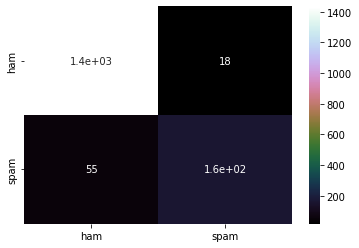

In [48]:
#Classification report
print(classification_report(y_test,adam_pred))
#confusion_matrix
cn=confusion_matrix(y_test,adam_pred)
sns.heatmap(cn,annot=True,cmap="cubehelix",xticklabels=['ham','spam'],yticklabels=['ham','spam'])

# Print the all model classification report

In [49]:
#Create a function to print the all model classification report
def model_classification(models,names,X_train,y_train,X_test,y_test):
    #create for loop for the model and name in zip of models,names
    for (model,name) in zip(models,names):
        #Prediction to the test data
        y_pred=model.predict(X_test)
        #Using the prediction to visualize the classification_report
        result=classification_report(y_test,y_pred)
        #And finaly print the classification report and divide the each classification report
        print("Classification Report \n",result)
        print("---------------------------------------------------------------------------------------")
        print("***************************************************************************************")
        print("########################################################################################")

In [50]:
#Create a list for the models
models=[logistic,tree,random,xgb,multinomial,adam]
#Create a list for the names
names=['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','XGBboostClassifier','multinomialNB','AdamBoostClassifier']
#And finally define the function with models and names
model_classification(models,names,X_train,y_train,X_test,y_test)

Classification Report 
               precision    recall  f1-score   support

         ham       0.94      1.00      0.97      1453
        spam       0.97      0.61      0.75       219

    accuracy                           0.95      1672
   macro avg       0.96      0.80      0.86      1672
weighted avg       0.95      0.95      0.94      1672

---------------------------------------------------------------------------------------
***************************************************************************************
########################################################################################
Classification Report 
               precision    recall  f1-score   support

         ham       0.97      0.98      0.98      1453
        spam       0.84      0.83      0.83       219

    accuracy                           0.96      1672
   macro avg       0.91      0.90      0.91      1672
weighted avg       0.96      0.96      0.96      1672

---------------------------------

# About the data Classification reports:
### Observe the above classification report, DecisionTreeClassifier given 96%,RandomForestClassifier given 97% and XGBClassifier given 97% accuracy_scores, the reaming model also give 95% accuracy_scores.And we also visualize the confusin_matrix using the seaborn

# How to perfom the our model to the data

In [51]:
text="free entry wkly comp win FA Cup final tkts st May Text FA receive entry questionstd txt ratetcs apply over"
text=[text]
text_int=vector.transform(text)
prediction=tree.predict(text_int)
f"The email is {prediction[0]}"

'The email is spam'

In [52]:
text="go jurong point crazy Available bugis n great world la e buffet Cine get amore wat"
text=[text]
text_int=vector.transform(text)
prediction=random.predict(text_int)
f"The email is {prediction[0]}"

'The email is ham'

In [53]:
text='I m go to home soon do not want talk stuff anymore tonight k I ve cry enough today'
text=[text]
text_int=vector.transform(text)
prediction=xgb.predict(text_int)
f"The email is {prediction[0]}"

'The email is ham'

In [54]:
text='WINNER as value network customer select receivea å£ prize reward to claim call Claim code KL Valid hour'
text=[text]
text_int=vector.transform(text)
prediction=xgb.predict(text_int)
f"The email is {prediction[0]}"

'The email is spam'

In [55]:
text='have mobile month U r entitle Update late colour mobile camera Free Call the Mobile Update Co FREE'
text=[text]
text_int=vector.transform(text)
prediction=random.predict(text_int)
f"The email is {prediction[0]}"

'The email is spam'

# CONCLUSION

### The dataset is taken from the Kaggle website, We predict the text is spam or harm, The data prepocessing contain several steps such as  basicEDA, text preprocessing, build different models, such as LogisticRegression,DecisiontreeClassification,RandomForestClassication,XGBboostClassifier,For the above model  DecisiontreeClassification,RandomForestClassication,XGBboostClassifier, have good accuracy score compare to the other model. After that We do Perfome the models for the test data and use the demo it.